In [2]:
#NEXT CHallenge: figure out how to get the data formatted correctly so I can add StationID as a dimension for SWresults_var

#helpful link about working with netcdf4: https://iescoders.com/writing-netcdf4-data-in-python/
#helpful link for strptime formatting: https://www.journaldev.com/23365/python-string-to-datetime-strptime
#helpful link with examples of netcdf4.date2num(): https://www.programcreek.com/python/example/89490/netCDF4.date2num
#a few imports and installations:
import netCDF4 as nc
from netCDF4 import Dataset as NetCDFFile
from netCDF4 import date2num
import xarray as xr
from datetime import datetime as dt
import numpy as np
!cd /Users/bennysmith/Documents/Climate_Science/Research_with_Baylor
!rm test.nc

#opening the .nc file with the data I'd like to use:
mydirectory = '/Users/bennysmith/Documents/Climate_Science/Research_with_Baylor'
ncstart = NetCDFFile(mydirectory+'/DOH_2018_SAFE.nc')
CollectionTime_start = ncstart.variables['CollectionTime']
SWresults_start = ncstart.variables['SWresults']
StationID_start = ncstart.variables['StationID']

timelist = []
for i in CollectionTime_start:
    timelist.append(dt.strptime(i, '%m/%d/%y %I:%M %p'))
timelist2 = date2num(timelist, 'minutes since 2018-05-24 13:20:00')

    
#Making the netcdf file:
mync = nc.Dataset('test.nc', 'w', format='NETCDF4')
time_dim = mync.createDimension('time', None)
SWresults_dim = mync.createDimension('SWresults', 1461)
StationID_dim = mync.createDimension('StationID', 1461)

SampleID_dim = mync.createDimension('SampleID', 1461)
WaterType_dim = mync.createDimension('WaterType', 1461)
Duplicate_dim = mync.createDimension('Duplicate', 1461)
Validation_dim = mync.createDimension('Validation', 1461)
Test_Type_dim = mync.createDimension('Test_Type', 1461)
Sampler_dim = mync.createDimension('Sampler', 1461)
BeachID_dim = mync.createDimension('BeachID', 1461)

time_var = mync.createVariable('time', np.float64, ('time',))
SWresults_var = mync.createVariable('SWresults', 'float64', ('time',))
StationID_var = mync.createVariable('StationID', np.str, ('StationID'))

time_var[:] = timelist2[:]
SWresults_var[:] = SWresults_start[:] #The index and colon are very important; if you don't include these it will just reset the values of the values, which prevents the data from being saved to the new netcdf.
StationID_var[:] = StationID_start[:]

print(mync)
# unique = []
# for i in StationID_var:
#     #print(i)
#     if i not in unique:
#         unique.append(i)
# print(len(unique))
# uniquetime = []
# for i in time:
#     if i not in uniquetime:
#         uniquetime.append(i)
# print(len(uniquetime))
        
mync.close() #this is a VERY important line!! If you don't close the file, not all the data gets written

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(1461), SWresults(1461), StationID(1461), LabID(1461)
    variables(dimensions): float64 time(time), float64 SWresults(time), <class 'str'> StationID(StationID)
    groups: 



KeysView(Frozen({'time': <xarray.IndexVariable 'time' (time: 1461)>
array([0.00000e+00, 5.00000e+00, 6.83000e+03, ..., 1.40945e+05, 1.40948e+05,
       1.40951e+05]), 'SWresults': <xarray.Variable (time: 1461)>
array([184., 248.,  41., ...,  20.,  10.,  84.]), 'StationID': <xarray.IndexVariable 'StationID' (StationID: 27)>
array(['RI840021-01', 'RI840021-01', 'RI840021-01', 'RI840021-01',
       'RI840021-01', 'RI840021-01', 'RI840021-01', 'RI840021-01',
       'RI840021-01', 'RI840021-01', 'RI840021-01', 'RI840021-01',
       'RI840021-01', 'RI840021-01', 'RI840021-01', 'RI840021-01',
       'RI840021-01', 'RI840021-01', 'RI840021-01', 'RI840021-01',
       'RI840021-01', 'RI840021-01', 'RI840021-01', 'RI840021-01',
       'RI840021-01', 'RI840021-01', 'RI840021-01'], dtype=object)}))
<xarray.Dataset>
Dimensions:    (StationID: 27, time: 1461)
Coordinates:
  * time       (time) float64 0.0 5.0 6.83e+03 ... 1.409e+05 1.409e+05 1.41e+05
  * StationID  (StationID) object 'RI840021-01' 'R

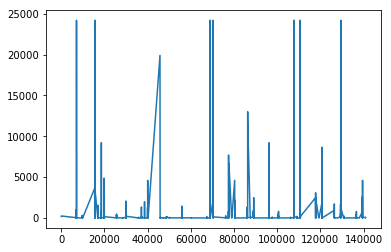

In [16]:
mydirectory = '/Users/bennysmith/Documents/Climate_Science/Research_with_Baylor'
import matplotlib.pyplot as plt
import xarray as xr
ncnew = xr.open_dataset(mydirectory+'/test.nc')
SWresults = ncnew.variables['SWresults'][:]
StationID = ncnew.variables['StationID']
time = ncnew.variables['time'][:]
plt.plot(time, SWresults)